In [28]:
import fiftyone as fo
from fiftyone import ViewField as F
import glob
from tidecv import TIDE, datasets
dataset = fo.load_dataset('RumexWeeds')


In [2]:
if 'yolox_s_rumexweeds' not in dataset.list_evaluations():
    results_yolox_s_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_s_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_s_rumexweeds")
else:
    results_yolox_s_test = dataset.load_evaluation_results('yolox_s_rumexweeds')

In [3]:
if "yolox_l_rumexweeds_test" not in dataset.list_evaluations():
    results_yolox_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_l_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_l_rumexweeds_test")
else:
    results_yolox_l_test = dataset.load_evaluation_results('yolox_l_rumexweeds_test')

In [4]:
if "yolox_dn53_rumexweeds_test" not in dataset.list_evaluations():
    results_yolox_dn53_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_DarkNet53_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_dn53_rumexweeds_test")
else:
    results_yolox_dn53_test = dataset.load_evaluation_results('yolox_dn53_rumexweeds_test')

In [5]:
if "yolor_p6_rumexweeds_test" not in dataset.list_evaluations():
    results_yolor_p6_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolor_p6_1920', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolor_p6_rumexweeds_test")
else:
    results_yolor_p6_test = dataset.load_evaluation_results("yolor_p6_rumexweeds_test")

In [6]:
if "yolov5_l_rumexweeds_test" not in dataset.list_evaluations():
    results_yolov5_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolov5_l', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolov5_l_rumexweeds_test")
else:
    results_yolov5_l_test = dataset.load_evaluation_results("yolov5_l_rumexweeds_test")

In [7]:
print(f"dataset : mAP")
for eval in dataset.list_evaluations():
    results = dataset.load_evaluation_results(eval)
    print(f"{eval} : {results.mAP()}")

dataset : mAP
yolor_p6_rumexweeds_test : 1.9225256249283668e-06
yolov5_l_rumexweeds_test : 0.1931723510508127
yolox_dn53_rumexweeds_test : 0.0
yolox_l_rumexweeds_test : 0.0005111528783735291
yolox_s_rumexweeds : 0.0007364151488444492
yolox_s_rumexweeds_test : 0.0007364151488444492


In [42]:
rumex_obs_only_view = dataset.filter_labels('ground_truth_detections', F("label").is_in(["rumex_obtusifolius"]), only_matches=False)
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_l_rumexweeds", labels_path="yolox_l_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_s_rumexweeds", labels_path="yolox_s_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_DarkNet53_rumexweeds", labels_path="yolox_DarkNet53_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolor_p6_1920", labels_path="yolor_p6_1920_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolov5_l", labels_path="yolor_v5_l_preds.json")

 100% |███████████████| 1535/1535 [42.5s elapsed, 0s remaining, 35.3 samples/s]      
 100% |███████████████| 1535/1535 [40.0s elapsed, 0s remaining, 37.6 samples/s]      
 100% |███████████████| 1535/1535 [39.0s elapsed, 0s remaining, 38.4 samples/s]      
 100% |███████████████| 1535/1535 [40.5s elapsed, 0s remaining, 37.6 samples/s]      
 100% |███████████████| 1535/1535 [38.8s elapsed, 0s remaining, 37.3 samples/s]      


In [43]:
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="ground_truth_detections", labels_path="ground_truth_detections.json")

 100% |███████████████| 1535/1535 [41.9s elapsed, 0s remaining, 37.2 samples/s]      


-- yolor_p6_1920_preds --

bbox AP @ 50: 0.00

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00     9.46     0.00     0.00     0.00     0.00  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       0.99       0.07  

-- yolor_v5_l_preds --

bbox AP @ 50: 26.45

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00    12.26     0.00     0.00    11.81    15.78  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      22.07      25.57  

-- yolox_DarkNet53_rumexweeds_preds --

bbox AP @ 50: 0.00

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   d

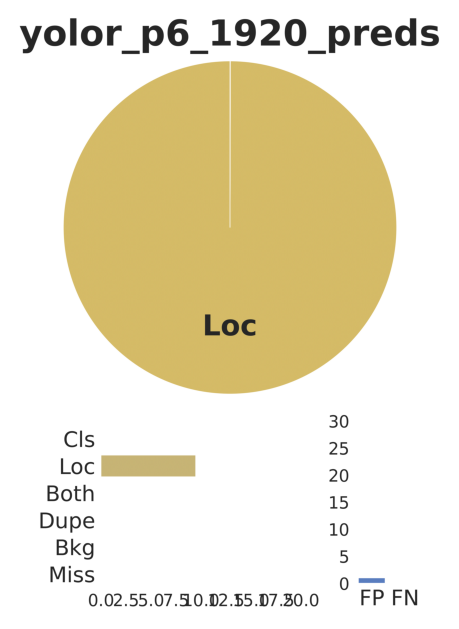

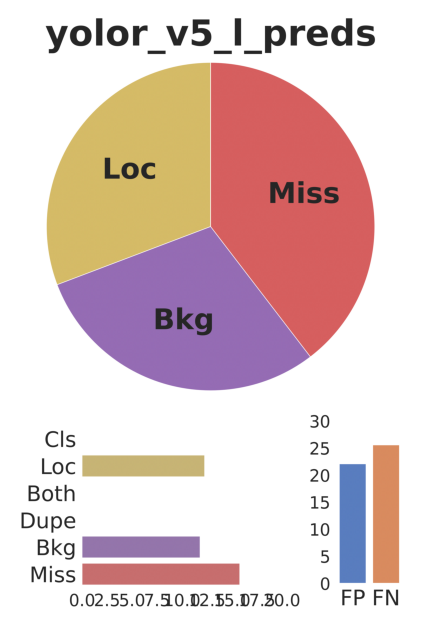

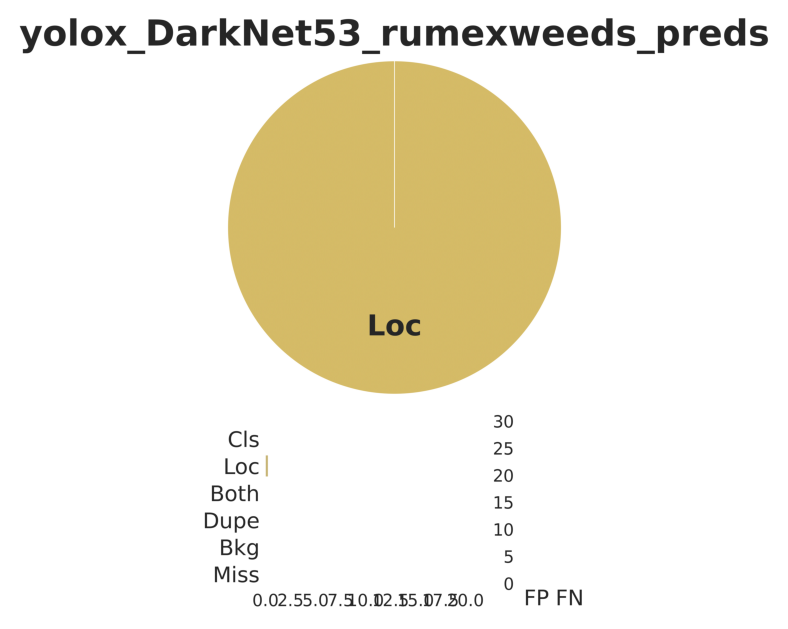

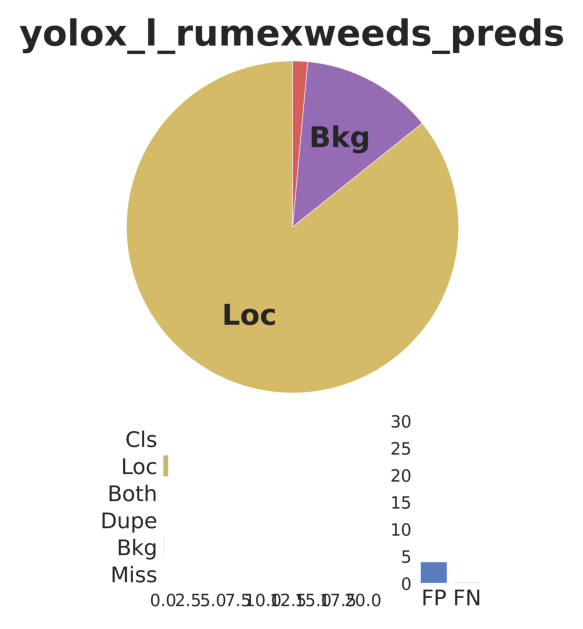

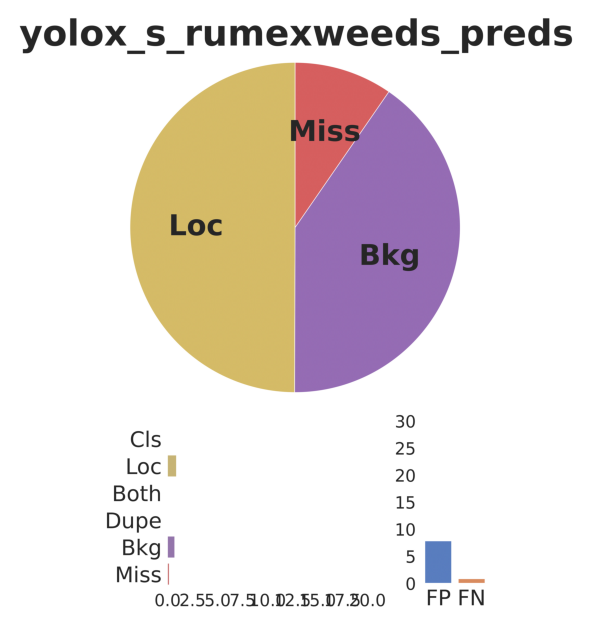

In [44]:
tide = TIDE()
for pred_file in glob.glob('*preds.json'):
    tide.evaluate(datasets.COCO("ground_truth_detections.json", "RumexWeeds_test"), datasets.COCO(pred_file), mode=TIDE.BOX)
tide.summarize()
tide.plot()

In [34]:
dataset.values('ground_truth_detections.detections.label')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 None,
 None,
 None,
 None,
 None,
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],
 None,
 None,
 None,
 None,
 None,
 ['rumex_obtusifolius'],
 ['rumex_obtusifolius'],

In [15]:
session = fo.Session(dataset=dataset, auto=False)